# Введение в обработку текста на естественном языке

Материалы:
* Макрушин С.В. Лекция 9: Введение в обработку текста на естественном языке\
* https://realpython.com/nltk-nlp-python/
* https://scikit-learn.org/stable/modules/feature_extraction.html

## Лабораторная работа 9

### Расстояние редактирования

1.1 Загрузите предобработанные описания рецептов из файла `preprocessed_descriptions.csv`. Получите набор уникальных слов `words`, содержащихся в текстах описаний рецептов (воспользуйтесь `word_tokenize` из `nltk`). 

In [1]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from IPython.display import display

In [2]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    return text

In [3]:

descriptions = ' '.join(pd.read_csv('data/recipes_sample.csv')['description'].sample(5))

words = word_tokenize(preprocess_text(descriptions))
unique_words = list(set(words))
print(f'Уникальные слова: {", ".join(unique_words)}')

Уникальные слова: snack, your, warm, spinach, mushroom, was, taught, side, salad, cuisine, for, day, house, any, roll, on, i, loaf, favourite, triple, typical, served, me, ll, this, note, thing, comes, which, a, nori, layered, friend, real, pita, is, entree, chicken, salsa, during, bread, and, sushi, its, with, started, tzaziki, style, will, can, they, layers, guests, sandwich, s, very, taste, cucumber, make, slices, game, sauce, be, he, here, used, hudson, chutney, two, lovers, california, as, how, english, sandwiched, the, greens, healthy, dish, australian, wisconsin, serve, love, american, from, to, between, of, ized, wrapper, filling, seaweed, jefferson, or, tasteful, ya, artichoke, leftover, easy, layer, out, recipe, it, japanese, because, check, in, my, pre


1.2 Сгенерируйте 5 пар случайно выбранных слов и посчитайте между ними расстояние редактирования.

In [4]:
import random
from nltk.metrics import edit_distance

In [5]:
for i in range(5):
    word1, word2 = random.sample(unique_words, 2)
    distance = edit_distance(word1, word2)
    print(f"Расстояние редактирования между '{word1}' и '{word2}' равно {distance}.")

Расстояние редактирования между 'in' и 'served' равно 6.
Расстояние редактирования между 'pita' и 'snack' равно 5.
Расстояние редактирования между 'chicken' и 'can' равно 5.
Расстояние редактирования между 'in' и 'easy' равно 4.
Расстояние редактирования между 'slices' и 'taste' равно 5.


1.3 Напишите функцию, которая для заданного слова `word` возвращает `k` ближайших к нему слов из списка `words` (близость слов измеряется с помощью расстояния Левенштейна)

In [6]:
def k_nearest_words(word, words, k):
    
    # расстояние Левенштейна
    distances = {w: edit_distance(word, w) for w in words if w != word}
    nearest_words = sorted(distances.items(), key=lambda x: x[1])[:k]
    return [w[0] for w in nearest_words]

In [7]:
example = random.sample(unique_words, 1)[0]

print(example)
print(k_nearest_words(example, unique_words, 3))


sandwiched
['sandwich', 'slices', 'sauce']


### Стемминг, лемматизация

2.1 На основе результатов 1.1 создайте `pd.DataFrame` со столбцами: 
    * word
    * stemmed_word 
    * normalized_word 

Столбец `word` укажите в качестве индекса. 

Для стемминга воспользуйтесь `SnowballStemmer`, для нормализации слов - `WordNetLemmatizer`. Сравните результаты стемминга и лемматизации.

In [8]:
import pandas as pd
import nltk
from nltk.stem import SnowballStemmer, WordNetLemmatizer
#vnltk.download('wordnet')
# nltk.download('omw-1.4')

In [9]:
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
stemmed_words = [stemmer.stem(word) for word in unique_words]
lemmatized_words = [lemmatizer.lemmatize(word) for word in unique_words]
df = pd.DataFrame({
    'word': unique_words,
    'stemmed_word': stemmed_words,
    'normalized_word': lemmatized_words
})
df.index = df.index + 1
df

,word,stemmed_word,normalized_word
1,snack,snack,snack
2,your,your,your
3,warm,warm,warm
4,spinach,spinach,spinach
5,mushroom,mushroom,mushroom
...,...,...,...
105,because,becaus,because
106,check,check,check
107,in,in,in
108,my,my,my


2.2. Удалите стоп-слова из описаний рецептов. Какую долю об общего количества слов составляли стоп-слова? Сравните топ-10 самых часто употребляемых слов до и после удаления стоп-слов.

In [10]:
from nltk.corpus import stopwords
# nltk.download('stopwords')

In [11]:
stop_words = set(stopwords.words("english"))

# Удаление стоп-слов
filtered_word_list = [word for word in words if word not in stop_words]
stop_word_ratio = 1 - len(filtered_word_list)/len(words)
print('Доля стоп-слов от общего количества слов: {:.2%}'.format(stop_word_ratio))

Доля стоп-слов от общего количества слов: 47.13%


In [12]:
words_top = pd.DataFrame(words).stack().value_counts().reset_index()[:10]
words_top.columns = ['word', 'count']
words_top.index = words_top.index + 1
print(f'Топ-10 Слов без удаления стоп-слов:\n\n{words_top}\n\n')

filtered_words_top = pd.DataFrame(filtered_word_list).stack().value_counts().reset_index()[:10]
filtered_words_top.columns = ['word', 'count']
filtered_words_top.index = filtered_words_top.index + 1
print(f'Топ-10 Слов c удаления стоп-слов:\n\n{filtered_words_top}')

Топ-10 Слов без удаления стоп-слов:

      word  count
1      the      7
2        a      6
3     this      5
4   recipe      5
5       or      4
6       is      3
7     with      3
8       to      3
9       in      3
10    from      3


Топ-10 Слов c удаления стоп-слов:

         word  count
1      recipe      5
2       sauce      2
3        side      2
4        dish      2
5      entree      2
6       sushi      2
7   favourite      2
8       serve      2
9        easy      1
10      snack      1


### Векторное представление текста

3.1 Выберите случайным образом 5 рецептов из набора данных. Представьте описание каждого рецепта в виде числового вектора при помощи `TfidfVectorizer`

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
recipes = pd.read_csv('data/recipes_sample.csv').sample(5)

In [15]:
vectorizer = TfidfVectorizer(norm='l1')
vectors = vectorizer.fit_transform(recipes['description'])
vectors.toarray()[0]

array([0.        , 0.04362899, 0.04362899, 0.0351996 , 0.02457981,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04362899, 0.0351996 , 0.04362899,
       0.        , 0.0351996 , 0.04362899, 0.        , 0.04362899,
       0.04362899, 0.02457981, 0.        , 0.        , 0.04362899,
       0.        , 0.        , 0.04362899, 0.04362899, 0.        ,
       0.        , 0.        , 0.0351996 , 0.        , 0.        ,
       0.        , 0.04362899, 0.02921885, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0351996 ,
       0.07039919, 0.02078945, 0.04362899, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04362899, 0.04362899, 0.04362899])

3.2 Вычислите близость между каждой парой рецептов, выбранных в задании 3.1, используя косинусное расстояние (`scipy.spatial.distance.cosine`) Результаты оформите в виде таблицы `pd.DataFrame`. В качестве названий строк и столбцов используйте названия рецептов.

In [16]:
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
results = pd.DataFrame(columns=recipes['name'], index=recipes['name'])

for i, vector1 in enumerate(vectors):
    for j, vector2 in enumerate(vectors):
        similarity = 1 - cosine(*vector1.toarray(), *vector2.toarray())
        results.iloc[i, j] = similarity

results = results.applymap(lambda x: f"{x*100:.2f}%")
results

name,greek zucchini cakes,chickpea avocado and sun dried tomato salad,tomatoes stuffed with corn chili,egyptian rice with spicy tomato sauce,p f chang s shrimp with lobster sauce
name,,,,,
greek zucchini cakes,100.00%,8.30%,30.17%,5.15%,6.33%
chickpea avocado and sun dried tomato salad,8.30%,100.00%,10.58%,3.69%,8.88%
tomatoes stuffed with corn chili,30.17%,10.58%,100.00%,5.37%,11.14%
egyptian rice with spicy tomato sauce,5.15%,3.69%,5.37%,100.00%,23.43%
p f chang s shrimp with lobster sauce,6.33%,8.88%,11.14%,23.43%,100.00%


In [18]:
# альтернативный вариант
similarity_matrix = cosine_similarity(vectors)


results = pd.DataFrame(similarity_matrix, columns=recipes['name'], index=recipes['name'])
results = results.applymap(lambda x: f"{x*100:.2f}%")


display(results)


name,greek zucchini cakes,chickpea avocado and sun dried tomato salad,tomatoes stuffed with corn chili,egyptian rice with spicy tomato sauce,p f chang s shrimp with lobster sauce
name,,,,,
greek zucchini cakes,100.00%,8.30%,30.17%,5.15%,6.33%
chickpea avocado and sun dried tomato salad,8.30%,100.00%,10.58%,3.69%,8.88%
tomatoes stuffed with corn chili,30.17%,10.58%,100.00%,5.37%,11.14%
egyptian rice with spicy tomato sauce,5.15%,3.69%,5.37%,100.00%,23.43%
p f chang s shrimp with lobster sauce,6.33%,8.88%,11.14%,23.43%,100.00%


3.3 Какие рецепты являются наиболее похожими? Прокомментируйте результат (словами).

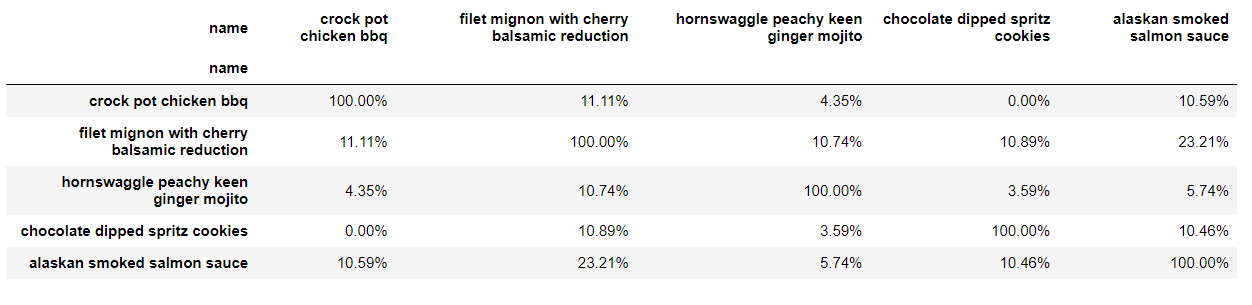

Из таблицы видно, что наиболее похожими являются "filet mignon with cherry balsamic reduction" и "alaskan smoked salmon sauce", с коэффициентом сходства 23.21%. Это может быть связано с тем, что оба рецепта содержат мясо и соус, а также с тем, что они являются более сложными рецептами по сравнению с другими рецептами в таблице.

Также можно заметить, что "hornswaggle peachy keen ginger mojito" имеет наименьшее косинусное расстояние с "crock pot chicken bbq", что может быть связано с тем, что оба рецепта являются более простыми и содержат более базовые ингредиенты, такие как мясо и фрукты.

Однако, нельзя сказать, что эти рецепты сильно похожи, так как значение все же не очень высокое. В целом, результаты могут помочь выявить общие черты между некоторыми рецептами, но не дают полной картины о сходстве между ними.